In [26]:
import pandas as pd
import os 

In [27]:
vehicle_names = ["SEB880", "SEB882", "SEB883", "SEB885", "SEB888", "SEB889"]
#vehicle_names = ["SEB880"]

PATH_TO_LOAD = "../Processed_data_new/01_Eso_Extracted"

df = pd.DataFrame()

for vehicel in vehicle_names:

    df_curr = pd.read_csv(os.path.join(PATH_TO_LOAD, f"{vehicel}_extracted_eso.csv"))
    df = pd.concat([df, df_curr])

In [28]:
df = df[["ID", "FunctionValue", "domain"]]
df

,ID,FunctionValue,domain
0,/climate/systemActivation,on,climate
1,/climate/systemActivation,on,climate
2,/climate/rearSeatHeatingLeft,0,climate
3,/climate/rearSeatHeatingRight,0,climate
4,/climate/airConditioning,on,climate
...,...,...,...
110511,/main/interactionPath,/co-driver/home/app/main,main
110512,/navi/context,black,navi
110513,/media/context,Radio,media
110514,/media/context,Radio,media


In [7]:
# /navi/onSelectHome 
# /navi/onSelectBusiness

# Select domain
df_curr = df[df.domain == "car"]
# select value
#df_curr = df_curr[df_curr.FunctionValue.str.contains("house")]
#df_curr = df[df.ID == "/main/buttonPress"]
df_curr.ID.value_counts()

ID
/car/charismaLevel                                         92
/car/comfort/driverSeatHeating                             43
/car/comfort/codriverSettingsFromDriver                    42
/car/comfort/ambientLight/colorSetting                     37
/car/comfort/rightMassageProgramPopup                      27
/car/eSound                                                26
/car/comfort/ambientLight/totalBrightnessSetting           18
/car/assist/laneDepartureWarning                           15
/car/intelligentRecuperation                               13
/car/assist/exitAssistant                                  12
/car/comfort/leftMassageProgramPopup                       11
/car/driveDamper                                           10
/car/driveMode                                              8
/car/settings/bootOpen                                      8
/car/assist/laneChangeAssist                                8
/car/comfort/ambientLight/doorBrightnessSetting             7
/car/

In [13]:
"""
/navi/context
/navi/onDestinationSelect 
"""
str_to = "navi"
df_curr = df[df.ID.str.contains(str_to)]
print(df_curr.value_counts())

ID                         FunctionValue                                                                                                                                                                  domain
/navi/context              bigmap                                                                                                                                                                         navi      4610
                           icon                                                                                                                                                                           navi      3279
                           default                                                                                                                                                                        navi      2703
                           black                                                                                                            

In [14]:
str_to = "/navi/onDestinationSelect"
df_curr = df[df.ID.str.contains(str_to)]
print(df_curr.value_counts())

ID                         FunctionValue                                                                                                                                                                                                                                                                                                                                                                                                                             domain
/navi/onDestinationSelect  Porschestraße 911, Weissach                                                                                                                                                                                                                                                                                                                                                                                                               navi      189
                           Heidestraße 53, Stuttgart                     

In [15]:
str_to = "home"
df_curr = df[df.FunctionValue.str.contains(str_to)]
print(df_curr.value_counts())

ID                     FunctionValue                                                                             domain
/main/context          home                                                                                      main      1987
/main/interactionPath  /center/home/app/main                                                                     main      1386
                       /co-driver/home/app/main                                                                  main       996
                       /co-driver/home                                                                           main       906
                       /center/home/app                                                                          main       712
                       /center/home                                                                              main       578
                       /co-driver/home/app                                                                      

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

# Sample data
# "Country" and "Climate" categories
countries = ["USA", "Canada", "Mexico"]
climates = ["tropical", "mid"]

# Create a combined vocabulary
combined_vocab = countries + climates

# Assign unique integer values to categories
category_to_index = {category: index for index, category in enumerate(combined_vocab)}
print("cat index: ", category_to_index)

# Sample input data
# Each entry is a pair [country_index, climate_index]
data = [[0, 0],  # USA, tropical
        [1, 1],  # Canada, mid
        [2, 0]]  # Mexico, tropical

# Convert input data to PyTorch tensors
data = torch.LongTensor(data)

# Define the embedding dimension
embedding_dim = 5

# Create a shared embedding layer
embedding_layer = nn.Embedding(len(combined_vocab), embedding_dim)

# Forward pass through the embedding layer
embedded_data = embedding_layer(data)

# Define a simple model (you can extend this model as needed)
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.embedding = embedding_layer
        self.fc = nn.Linear(embedding_dim * 2, 1)  # Concatenate embeddings for both variables

    def forward(self, x):
        embedded_x = self.embedding(x)
        # Flatten and concatenate embeddings
        flattened_x = embedded_x.view(embedded_x.size(0), -1)
        output = self.fc(flattened_x)
        return output

# Create an instance of the model
model = Model()

# Define a loss function and optimizer (for demonstration purposes)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop (for demonstration purposes)
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(data)
    loss = criterion(outputs, torch.randn(outputs.size()))  # Random target for demonstration
    loss.backward()
    optimizer.step()

# Print the learned embeddings
for idx, category in enumerate(combined_vocab):
    category_index = torch.LongTensor([idx])
    embedding = embedding_layer(category_index)
    print(f"{category}: {embedding.detach().numpy()}")


cat index:  {'USA': 0, 'Canada': 1, 'Mexico': 2, 'tropical': 3, 'mid': 4}
USA: [[-0.19281998  0.09029818  0.70679265 -0.9315732  -0.15784296]]
Canada: [[-0.6754021   0.06241823 -0.5358334   0.01132174 -1.3317024 ]]
Mexico: [[ 0.661705   -1.6733457   1.0722387  -1.3799618  -0.16819052]]
tropical: [[ 0.26454315  1.340142    0.17879869  0.730547   -1.9770713 ]]
mid: [[ 1.2420306  -1.5131489  -0.49861336  1.1546141  -1.110129  ]]


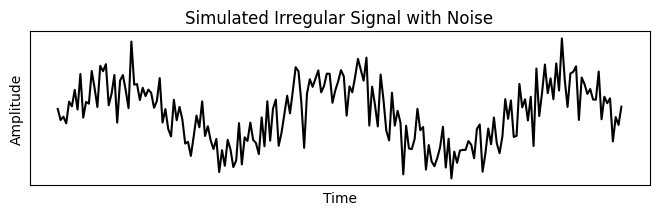

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a time axis (e.g., from 0 to 10 with 100 data points)
t = np.linspace(0, 10, 200)

# Generate an irregular signal with random noise
amplitude = 1.0
noise_amplitude = 0.5  # Adjust this for the level of noise
signal = amplitude * np.sin(0.5 * np.pi * t) + noise_amplitude * np.random.randn(len(t))

# Create the plot
plt.figure(figsize=(8, 2))
plt.plot(t, signal, color="black")
plt.title('Simulated Irregular Signal with Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xticks([])  # Remove x-axis labels
plt.yticks([])  # Remove y-axis labels

plt.grid(False)
plt.show()


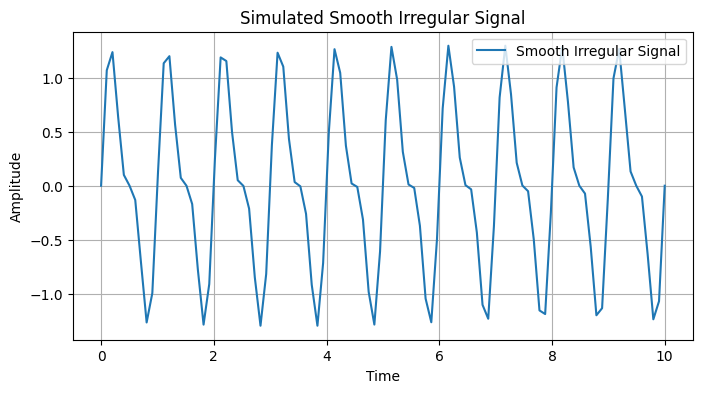

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a time axis (e.g., from 0 to 10 with 100 data points)
t = np.linspace(0, 10, 100)

# Generate an irregular signal with smooth variations
amplitude = 1.0

# Create a smooth signal using interpolation
smooth_signal = amplitude * np.sin(2 * np.pi * t) + 0.5 * np.sin(4 * np.pi * t)

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(t, smooth_signal, label='Smooth Irregular Signal')
plt.title('Simulated Smooth Irregular Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()
